<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Unnamed: 0         200000 non-null  int64          

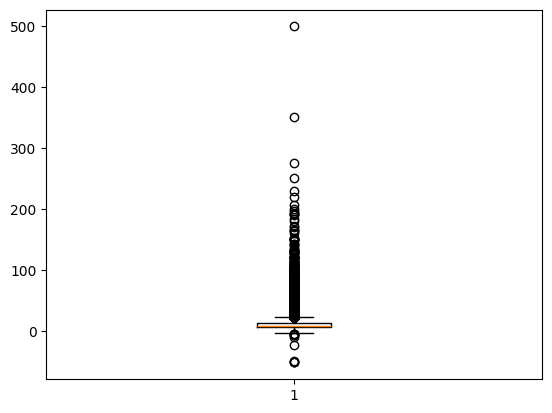

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

data = pd.read_csv('/home/vishal/Documents/datasets/uber.csv')

df = data.copy()

df.head()
df.info()
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])
df.info()
df.describe()
df.isnull().sum()
df.corr
df.dropna(inplace=True)
df.isnull().sum()

plt.boxplot(df["fare_amount"])
df.describe()

q_low = df["fare_amount"].quantile(0.01)
q_hi = df["fare_amount"].quantile(0.99)
df = df[(df["fare_amount"] < q_hi) & (df["fare_amount"] > q_low)]
df.isnull().sum()

x = df.drop("fare_amount", axis=1)
y = df["fare_amount"]

x["pickup_datetime"] = pd.to_numeric(pd.to_datetime(x["pickup_datetime"]))
x = x.loc[:, x.columns.str.contains("^Unnamed")]

print("x shape:", x.shape)
print("y shape:", y.shape)

df.describe()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

lrmodel = LinearRegression()
lrmodel.fit(x_train, y_train)

y_pred = lrmodel.predict(x_test)
y_pred

lrmodelrmse = np.sqrt(mean_squared_error(y_pred, y_test))
print("RMSE error for the model is ", lrmodelrmse)

rfrmodel = RandomForestRegressor(n_estimators=100, random_state=101)
rfrmodel.fit(x_train, y_train)

rfry_pred = rfrmodel.predict(x_test)
rfry_pred

rfrmodel_rmse = np.sqrt(mean_squared_error(rfry_pred, y_test))
print("RMSE value for Random Forest is:", rfrmodel_rmse)
